<a href="https://colab.research.google.com/github/shriram-pophale901/DMVPR/blob/main/assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
data = pd.read_csv("uber.csv")

In [ ]:
# Preview dataset
print(data.head())
print(data.info())


   Unnamed: 0                            key  fare_amount  \
0    24238194    2015-05-07 19:52:06.0000003          7.5   
1    27835199    2009-07-17 20:04:56.0000002          7.7   
2    44984355   2009-08-24 21:45:00.00000061         12.9   
3    25894730    2009-06-26 08:22:21.0000001          5.3   
4    17610152  2014-08-28 17:47:00.000000188         16.0   

           pickup_datetime  pickup_longitude  pickup_latitude  \
0  2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1  2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2  2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3  2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4  2014-08-28 17:47:00 UTC        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  
0         -73.999512         40.723217                1  
1         -73.994710         40.750325                1  
2         -73.962565         40.772647                1  
3         

In [ ]:
# Step 3: Preprocessing
# Drop rows with missing fare_amount or invalid values
data = data[(data['fare_amount'] > 0) &
            (data['pickup_longitude'].between(-180, 180)) &
            (data['dropoff_longitude'].between(-180, 180)) &
            (data['pickup_latitude'].between(-90, 90)) &
            (data['dropoff_latitude'].between(-90, 90))]

In [ ]:
# Step 4: Feature Engineering (Optional)
# Distance calculation (Haversine formula)
def haversine(lat1, lon1, lat2, lon2):
    R = 6371  # Earth radius in km
    phi1, phi2 = np.radians(lat1), np.radians(lat2)
    delta_phi = np.radians(lat2 - lat1)
    delta_lambda = np.radians(lon2 - lon1)
    a = np.sin(delta_phi/2.0)**2 + np.cos(phi1)*np.cos(phi2)*np.sin(delta_lambda/2.0)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    return R * c

data['distance_km'] = haversine(data['pickup_latitude'], data['pickup_longitude'],
                                data['dropoff_latitude'], data['dropoff_longitude'])

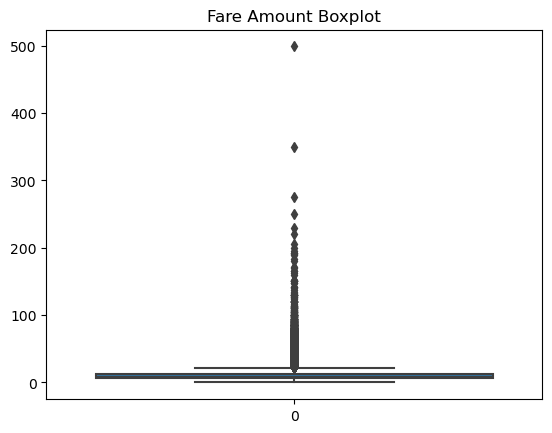

In [ ]:
# Step 5: Identify Outliers
sns.boxplot(data['fare_amount'])
plt.title("Fare Amount Boxplot")
plt.show()


In [ ]:
# Optional: remove extreme fares
data = data[data['fare_amount'] < 200]


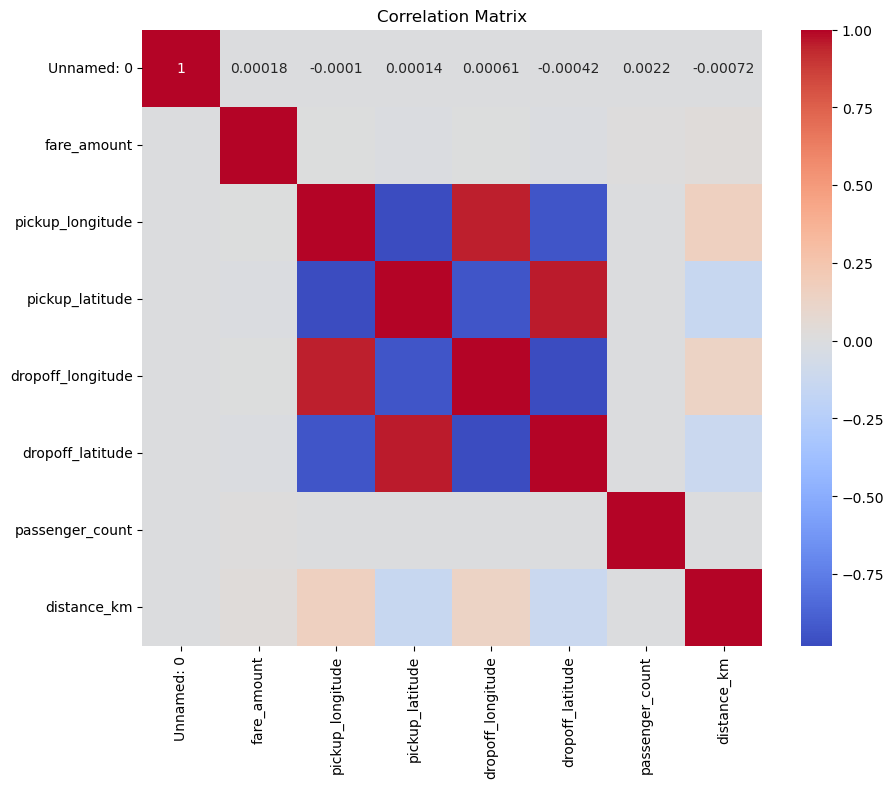

In [ ]:
# Step 6: Check correlation (numeric columns only)
numeric_data = data.select_dtypes(include=np.number)  # selects only numeric columns
corr = numeric_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Step 7: Prepare Features and Target
X = data[['distance_km']]  # simple model using distance
y = data['fare_amount']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Step 8: Implement Regression Models

# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Ridge Regression
ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

# Lasso Regression
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)


In [ ]:
# Step 9: Evaluate Models
def evaluate_model(y_test, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} --> RMSE: {rmse:.2f}, R2 Score: {r2:.2f}")

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_ridge, "Ridge Regression")
evaluate_model(y_test, y_pred_lasso, "Lasso Regression")

Linear Regression --> RMSE: 9.58, R2 Score: 0.00
Ridge Regression --> RMSE: 9.58, R2 Score: 0.00
Lasso Regression --> RMSE: 9.58, R2 Score: 0.00


In [ ]:
from google.colab import files
uploaded = files.upload()
print(uploaded)